In [8]:
import numpy as np
import pandas as pd 
import os
print(os.listdir("../input"))

['gathering-real-news-for-oct-dec-2016', 'fake-news']


In [9]:
fake_news = pd.read_csv("../input/fake-news/fake.csv")
real_news = pd.read_csv("../input/gathering-real-news-for-oct-dec-2016/real_news.csv")
real_news.to_csv('real.csv')

In [10]:
#Here are the size of our datasets:
print(fake_news.shape)
print(real_news.shape)

(12999, 20)
(15712, 11)


In [11]:
# Let's see what columns we have
print(list(fake_news.columns))
print(list(real_news.columns))

['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text', 'language', 'crawled', 'site_url', 'country', 'domain_rank', 'thread_title', 'spam_score', 'main_img_url', 'replies_count', 'participants_count', 'likes', 'comments', 'shares', 'type']
['Unnamed: 0', 'Unnamed: 0.1', 'id', 'title', 'publication', 'author', 'date', 'year', 'month', 'url', 'content']


Now let's obtain similar features for both datasets before we combine them.

title - title of article  
content - article text  
publication - which company published this article  
label - real or fake

We will have to parse the site_urls into publication names before merging.

In [12]:
# now let's obtain similar features for both datasets before we combine them
# Let's add our label to the dataset "real" for real news and "fake" for fake news

real_news2 = real_news[['title', 'content', 'publication']]
real_news2['label'] = 'real'
real_news2.head(15)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,title,content,publication,label
0,House Republicans Fret About Winning Their Hea...,WASHINGTON — Congressional Republicans have...,New York Times,real
1,"First, a Mixtape. Then a Romance. - The New Yo...","Just how is Hillary Kerr, the founder of ...",New York Times,real
2,Calling on Angels While Enduring the Trials of...,Angels are everywhere in the Muñiz family’s ap...,New York Times,real
3,U.S. Plans to Step Up Military Campaign Agains...,"ABU DHABI, United Arab Emirates — The Obama...",New York Times,real
4,272 Slaves Were Sold to Save Georgetown. What ...,WASHINGTON — The human cargo was loaded on ...,New York Times,real
5,"Among Travelers and Commuters, the Homeless St...",Wilson Silva said he knew the homeless situati...,New York Times,real
6,Bus Bombing in Jerusalem Wounds 21 - The New Y...,JERUSALEM — A bomb exploded on a bus in Jer...,New York Times,real
7,Syria Cease-Fire Crumbles as Bombings Kill Doz...,"BEIRUT, Lebanon — For 38 straight days, the...",New York Times,real
8,Iceland’s Water Cure - The New York Times,"On a frigid February day in Reykjavik, I stood...",New York Times,real
9,"Get to Know the Historical Figures on the $5, ...",WASHINGTON — The Treasury Department announ...,New York Times,real


In [13]:
fake_news2 = fake_news[['title', 'text','site_url']]
fake_news2['label'] = 'fake'
fake_news2.head(15)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,title,text,site_url,label
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup.com,fake
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup.com,fake
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup.com,fake
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup.com,fake
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup.com,fake
5,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,100percentfedup.com,fake
6,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,100percentfedup.com,fake
7,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,BREAKING! NYPD Ready To Make Arrests In Weiner...,100percentfedup.com,fake
8,BREAKING: CLINTON CLEARED...Was This A Coordin...,\nLimbaugh said that the revelations in the Wi...,100percentfedup.com,fake
9,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",Email \nThese people are sick and evil. They w...,100percentfedup.com,fake


In [14]:
# obtain all the unique site_urls
site_urls = fake_news2['site_url']

# remove the domain extensions
site_urls2 = [x.split('.',1)[0] for x in site_urls]

# replace the old site_url column
fake_news2['site_url'] = site_urls2
fake_news2.tail()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,title,text,site_url,label
12994,NaN,It DOES allow you to put a dog face on top of ...,zerohedge,fake
12995,NaN,Wait till you see what happens to the valuatio...,zerohedge,fake
12996,NaN,I'm waiting for the one that puts a pussy on m...,zerohedge,fake
12997,NaN,$4 Billion even after they are known to be kee...,zerohedge,fake
12998,NaN,of course - how else would they disceminate te...,zerohedge,fake


In [15]:
# rename the features in our datasets
newlabels = ['title', 'content', 'publication', 'label']
real_news2.columns = newlabels
fake_news2.columns = newlabels

# concatenate the dataframes
frames = [fake_news2, real_news2]
news_dataset = pd.concat(frames)
news_dataset

,title,content,publication,label
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup,fake
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup,fake
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup,fake
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup,fake
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup,fake
5,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,100percentfedup,fake
6,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,100percentfedup,fake
7,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,BREAKING! NYPD Ready To Make Arrests In Weiner...,100percentfedup,fake
8,BREAKING: CLINTON CLEARED...Was This A Coordin...,\nLimbaugh said that the revelations in the Wi...,100percentfedup,fake
9,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",Email \nThese people are sick and evil. They w...,100percentfedup,fake


Let's save our data frame as a new csv file called "news_dataset.csv".

In [16]:
news_dataset.to_csv('news_dataset.csv', encoding='utf-8')


In [17]:
news_dataset.iloc[13964]

title          Donald Trump’s New York Times Interview: Full ...
content        Following is a transcript of   Donald J. Trump...
publication                                       New York Times
label                                                       real
Name: 965, dtype: object

In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score  , classification_report , roc_curve

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [19]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
df=news_dataset
df

,title,content,publication,label
0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup,fake
1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup,fake
2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup,fake
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup,fake
4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup,fake
5,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,100percentfedup,fake
6,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,100percentfedup,fake
7,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,BREAKING! NYPD Ready To Make Arrests In Weiner...,100percentfedup,fake
8,BREAKING: CLINTON CLEARED...Was This A Coordin...,\nLimbaugh said that the revelations in the Wi...,100percentfedup,fake
9,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",Email \nThese people are sick and evil. They w...,100percentfedup,fake


In [21]:
df.isnull().sum()

title          680
content         46
publication      0
label            0
dtype: int64

In [22]:
df.fillna(' ',inplace=True)
df['details']=df['title']+' '+df['publication']

In [23]:
port_stem=PorterStemmer()

In [24]:
def stemming(content):
    #replace any non-alphabetic characters in the content variable with a space character
    stemmed_content= re.sub('[^a-zA-Z]',' ',content)
    #Convert all words into lower case letters
    stemmed_content = stemmed_content.lower() 
    # Split the words into list
    stemmed_content = stemmed_content.split()
    #generate a list of stemmed words from stemmed_content, excluding any stop words from the list
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    #Join the elements from the list 'stemmed_content' into a single string separated by spaces
    stemmed_content = " ".join(stemmed_content)
    return stemmed_content

In [25]:
df['details']

0        Muslims BUSTED: They Stole Millions In Gov’t B...
1        Re: Why Did Attorney General Loretta Lynch Ple...
2        BREAKING: Weiner Cooperating With FBI On Hilla...
3        PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...
4        FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...
5        Hillary Goes Absolutely Berserk On Protester A...
6        BREAKING! NYPD Ready To Make Arrests In Weiner...
7        WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...
8        BREAKING: CLINTON CLEARED...Was This A Coordin...
9        EVIL HILLARY SUPPORTERS Yell "F*ck Trump"…Burn...
10       YIKES! HILLARY GOES OFF THE RAILS…Pulls A Howa...
11       SAY GOODBYE! These 23 Hollywood Celebs Threate...
12       NOT KIDDING: Colleges Give Students “Safe Spac...
13       BOOM! MATH SHOWS Trump Would Have Beaten Obama...
14       BOOM! This Is How President Reagan Handled Pro...
15       TRUMP SUPPORTER GOT NUTS On MSNBC Reporter Cov...
16       TOMI LAHREN Has Special Message For Celebritie.

In [26]:
df['details']= df['details'].apply(stemming)

In [27]:
df['details']

0        muslim bust stole million gov benefit percentf...
1        attorney gener loretta lynch plead fifth perce...
2        break weiner cooper fbi hillari email investig...
3        pin drop speech father daughter kidnap kill is...
4        fantast trump point plan reform healthcar begi...
5        hillari goe absolut berserk protest ralli vide...
6        break nypd readi make arrest weiner case hilla...
7        wow whistleblow tell chill stori massiv voter ...
8        break clinton clear coordin last minut trick e...
9        evil hillari support yell f ck trump burn truc...
10       yike hillari goe rail pull howard dean video p...
11       say goodby hollywood celeb threaten leav u let...
12       kid colleg give student safe space cri trump w...
13       boom math show trump would beaten obama romney...
14       boom presid reagan handl protest negoti negoti...
15       trump support got nut msnbc report cover anti ...
16       tomi lahren special messag celebr said move ca.

In [ ]:
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
counts = count_vectorizer.fit_transform(df['details'].values)
tfidf = transformer.fit_transform(counts)


In [29]:
targets=df['label'].values
targets

array(['fake', 'fake', 'fake', ..., 'real', 'real', 'real'], dtype=object)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, targets, test_size=0.2, random_state=69)

In [31]:
print(f" X_train shape: {X_train.shape[0]}")
print(f"X_test shape: {X_test.shape[0]}")

 X_train shape: 22968
X_test shape: 5743


Training accuracy of Decision Tree is 1.0
testing accuracy of Decision Tree is 0.9970398746299843
             precision    recall  f1-score   support

       fake       1.00      0.99      1.00      2607
       real       0.99      1.00      1.00      3136

avg / total       1.00      1.00      1.00      5743



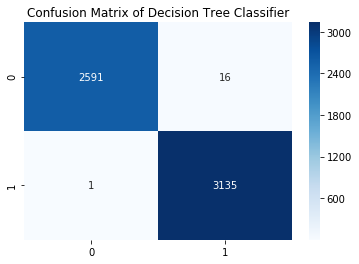

In [42]:
from sklearn.metrics import confusion_matrix
model=DecisionTreeClassifier(max_depth=50,random_state=69)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
conf_matrix=confusion_matrix(y_test,y_pred)
print(f"Training accuracy of Decision Tree is {model.score(X_train,y_train)}")
print(f"testing accuracy of Decision Tree is {model.score(X_test,y_test)}")
print(classification_report(y_test, y_pred))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix of Decision Tree Classifier")
plt.show()


Training accuracy of Naive Bayes is 0.9954719609892023
testing accuracy of Naive Bayes is 0.9533344941668118
             precision    recall  f1-score   support

       fake       1.00      0.90      0.95      2607
       real       0.92      1.00      0.96      3136

avg / total       0.96      0.95      0.95      5743



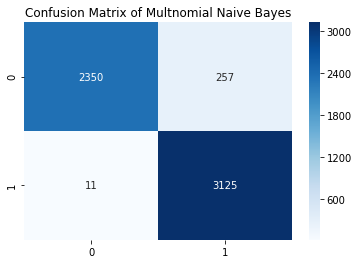

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Training accuracy of Naive Bayes is {model.score(X_train,y_train)}")
print(f"testing accuracy of Naive Bayes is {model.score(X_test,y_test)}")
conf_matrix=confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix of Multnomial Naive Bayes")
plt.show()

Training accuracy of SVM is 0.999695228143504
testing accuracy of SVC is 0.9966916245864531
             precision    recall  f1-score   support

       fake       1.00      0.99      1.00      2607
       real       0.99      1.00      1.00      3136

avg / total       1.00      1.00      1.00      5743



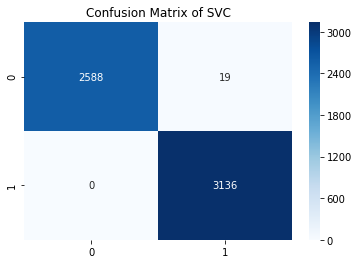

In [43]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
conf_matrix=confusion_matrix(y_test,y_pred)
print(f"Training accuracy of SVM is {model.score(X_train,y_train)}")
print(f"testing accuracy of SVC is {model.score(X_test,y_test)}")
print(classification_report(y_test, y_pred))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix of SVC")
plt.show()